# Lab 01: Introduction & Distances



## Summary

Welcome to the first week of Data Mining! This week, we'll start with a fundamental concept in unsupervised learning: distances. Think about how you measure similarity or difference between things in your everyday life: maybe by how close they are geographically, or how many traits they share.

In data mining, we use mathematical "distances" to quantify how similar or different data points are. This is a crucial tool for many unsupervised learning techniques, like grouping similar data points together (clustering) or finding items that are alike (similarity search). This week, we'll focus on a common and intuitive distance metric: *Euclidean distance.*

## Conceptual Explanation: Euclidean Distance

At its core, Euclidean distance (L2 Distance) is the straight-line distance between two points in space. You might remember calculating the distance between two points on a 2D graph using the Pythagorean theorem ($a^2 + b^2 = c^2$). Euclidean distance is simply an extension of this idea to any number of dimensions.

Imagine you have two data points, each representing something with several characteristics (like the height, weight, and age of a person). We can think of these characteristics as dimensions. The Euclidean distance between these two points is the length of the shortest line connecting them in this multi-dimensional space.

For two points $P = (p_1, p_2, ..., p_n)$ and $Q = (q_1, q_2, ..., q_n)$ in $n$-dimensional space, the Euclidean distance is calculated as:

$$
d(P, Q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + ... + (p_n - q_n)^2}
$$

$$
d(P, Q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
$$

In simpler terms, you find the difference between the coordinates of the two points in each dimension, square those differences, add them all up, and finally take the square root of the sum. A smaller Euclidean distance means the two points are more similar, while a larger distance means they are more different.

But atention, there are other ways you can calculate distances, for example Manhattan Distance (L1 Distance). The Manhattan distance between two points \( x \) and \( y \) is defined as:

$$
d(P, Q) = \sum_{i=1}^{n} |p_i - q_i|
$$

We will mostly be dealing with the Euclidean distance, so let's visualize this in 2D. It's just the hypotenuse of a right triangle. In 3D, it's the diagonal of a box. While we can't easily visualize higher dimensions, the mathematical concept remains the same.



Let's visualize this with a simple 2D example.

Imagine we have data points representing people based on just two characteristics: **Height (in cm)** and **Age (in years)**.

Consider two people:

1. Person A:
    - Height = 170 cm,
    - Age = 30 years


2. Person B:
    - Height = 185 cm,
    - Age = 25 years
    

We can plot these points on a 2D graph:

Point A: `(170, 30)`

Point B: `(185, 25)`


The Euclidean distance between Person A (170, 30) and Person B (185, 25) can be calculated using the formula:

$$
d(A, B) = \sqrt{(185 - 170)^2 + (25 - 30)^2}
$$


Now, using Python:

In [2]:
## No need to understand this code right now
import math

# Points for the 2D example (Height, Age)
person_a = (170, 30)
person_b = (185, 25)

# Calculate Euclidean distance
distance = math.sqrt((person_b[0] - person_a[0])**2 + (person_b[1] - person_a[1])**2)

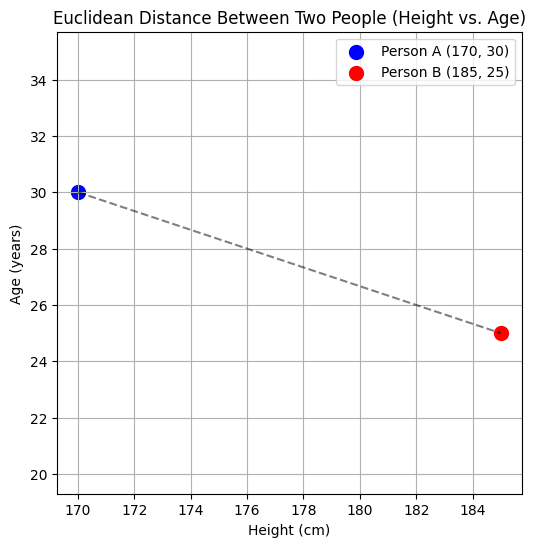

Euclidean distance between Person A and Person B: 15.81


In [3]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(person_a[0], person_a[1], color='blue', s=100, label='Person A (170, 30)')
plt.scatter(person_b[0], person_b[1], color='red', s=100, label='Person B (185, 25)')

# Draw a line connecting the two points (representing the Euclidean distance)
plt.plot([person_a[0], person_b[0]], [person_a[1], person_b[1]], 'k--', alpha=0.5) # k-- for black dashed line

# Add labels and title
plt.title('Euclidean Distance Between Two People (Height vs. Age)')
plt.xlabel('Height (cm)')
plt.ylabel('Age (years)')
plt.legend()
plt.grid(True)
plt.axis('equal') # Equal scaling for both axes
plt.show()

print(f"Euclidean distance between Person A and Person B: {distance:.2f}")

What if we also know the person's weight?

1. Person A:
    - Height = 170 cm,
    - Age = 30 years
    - Weight = 65 kg

2. Person B:
    - Height = 185 cm,
    - Age = 25 years
    - Weight = 78 kg


The Euclidean distance in 3D is:
$$
d(A, B) = \sqrt{(185 - 170)^2 + (25 - 30)^2 + (78 - 65)^2}
$$

In [4]:
# Points for the 3D example (Height, Age, Weight)
person_a_3d = (170, 30, 65)
person_b_3d = (185, 25, 78)

# Calculate Euclidean distance in 3D
distance_a_b_3d = math.sqrt((person_b_3d[0] - person_a_3d[0])**2 + (person_b_3d[1] - person_a_3d[1])**2 + (person_b_3d[2] - person_a_3d[2])**2)

print(f"Euclidean distance between Person A {person_a_3d} and Person B {person_b_3d} (3D): {distance_a_b_3d:.2f}")

Euclidean distance between Person A (170, 30, 65) and Person B (185, 25, 78) (3D): 20.47


Let's add a third person, Person C, to our examples to see how their distance from Person A and Person B compares.

1. Person A:
    - Height = 170 cm
    - Age = 30 years
    - Weight = 65 kg

2. Person B:
    - Height = 185 cm
    - Age = 25 years
    - Weight = 78 kg

3. Person C:
    - Height = 175 cm
    - Age = 28 years
    - Weight = 70 kg

The Euclidean distances are:

$$
d(A, B) = \sqrt{(185 - 170)^2 + (25 - 30)^2 + (78 - 65)^2} \\
d(B, C) = \sqrt{(175 - 185)^2 + (28 - 25)^2 + (65 - 70)^2} \\
d(A, C) = \sqrt{(175 - 170)^2 + (28 - 30)^2 + (65 - 65)^2} \\
$$

Let's wrap this into a function!

## Exercises

Here, we'll walk through calculating Euclidean distance using both pure Python and then leveraging libraries like NumPy and SciPy for efficiency.



### Part A: Python Implementation

Let's start by implementing the Euclidean distance calculation (in 2D) from scratch using standard Python.


$$
d(A, B) = \sqrt{(p_1[0] - p_2[0])^2 + (p_1[1] - p_2[1])^2}
$$


In [5]:
def euclidean_distance_2d(p1, p2):
  """Calculates the Euclidean distance between two 2D points."""
  return math.sqrt((p1[0] - p2[0])^2 + (p1[1] - p2[1])^2)



In [6]:
# Example usage in 2D
point_a_2d = (1, 2)
point_b_2d = (4, 6)

distance_a_b_2d = euclidean_distance_2d(point_a_2d, point_b_2d)

print(f"Euclidean distance between {point_a_2d} and {point_b_2d} (2D): {distance_a_b_2d:.2f}")

distance_pa_pb_2d = euclidean_distance_2d(person_a, person_b)

print(f"Euclidean distance between Person A {person_a} and Person B {person_b} (2D): {distance_pa_pb_2d:.2f}")


Euclidean distance between (1, 2) and (4, 6) (2D): 1.00


ValueError: math domain error

Now implement the 3D version:

In [7]:
def euclidean_distance_3d(p1, p2):
    """Calculates the Euclidean distance between two 3D points."""
    return math.sqrt(
        (p1[0] - p2[0])**2 +
        (p1[1] - p2[1])**2 +
        (p1[2] - p2[2])**2
    )

# Example usage in 3D
point_a_3d = (1, 2, 3)
point_b_3d = (4, 6, 8)
distance_a_b_3d = euclidean_distance_3d(point_a_3d, point_b_3d)
print(f"Euclidean distance between {point_a_3d} and {point_b_3d} (3D): {distance_a_b_3d:.2f}")



Euclidean distance between (1, 2, 3) and (4, 6, 8) (3D): 7.07


In [ ]:
# imports
import numpy as np
import pandas as pd

A `np.array` (NumPy array) is a powerful data structure provided by the NumPy library in Python. It represents a grid of values (numbers) all of the same type, and is used for efficient mathematical and logical operations.

Unlike Python lists, NumPy arrays:

- Support element-wise operations (e.g., adding two arrays directly)
- Are much faster for large-scale numerical computations
- Can be multi-dimensional (e.g., 1D vector, 2D matrix, 3D tensor)

Think of it as a matrix of data (or as an excel spreadsheet)

In [ ]:
def euclidean_dist_nd(p1, p2):
    """Calculates the Euclidean distance between two n-dimensional points."""
    # CODE HERE
    return

# Example usage in nD
point_a_nd = np.array([1, 2, 3, 4, 5])
point_b_nd = np.array([6, 7, 8, 9, 10])

distance_a_b_nd = euclidean_dist_nd(point_a_nd, point_b_nd)

print(f"Euclidean distance between {point_a_nd} and {point_b_nd} (nD): {distance_a_b_nd:.2f}")

In [ ]:
# Person C in 3D (Height, Age, Weight)
person_a_3d = np.array([170, 30, 65])
person_b_3d = np.array([185, 25, 78])
person_c_3d = np.array([175, 28, 70])

# Calculate Euclidean distance between Person A and Person B (3D)
print(f"Euclidean distance between Person A {person_a_3d} and Person B {person_b_3d} (3D): ")
print(f"{euclidean_dist_nd(person_a_3d, person_b_3d): .2f}\n")

# Calculate Euclidean distance between Person B and Person C (3D)
print(f"Euclidean distance between Person B {person_b_3d} and Person C {person_c_3d} (3D):")
print(f"{euclidean_dist_nd(person_b_3d, person_c_3d): .2f}\n")

# Calculate Euclidean distance between Person A and Person C (3D)
print(f"Euclidean distance between Person A {person_a_3d} and Person C {person_c_3d} (3D):")
print(f"{euclidean_dist_nd(person_a_3d, person_c_3d): .2f}\n")






### Part B: Distance Matrix Using the Iris Dataset

In this section, we'll use a real-world dataset, the Iris dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set), to demonstrate how to compute a distance matrix efficiently using libraries like NumPy and SciPy. A distance matrix is a square matrix that contains the distances between every pair of points in a dataset.

![Iris Flower](https://raw.githubusercontent.com/fpontejos/Data-Mining-24-25/main/figures/img/iris.png)

In [ ]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Select a subset of the data (e.g., the first 10 rows)
X_subset = X[:10]

In [ ]:
# Compute Euclidean distances manually using NumPy
# This calculates the distance between each pair of points in the subset
# Distance matrix will have shape of (len(X_subset), len(X_subset)
# distance_matrix_np =


# print("Distance matrix (manual NumPy implementation):\n", distance_matrix_np)
# print(f"Shape: ({len(distance_matrix_np)}, {len(distance_matrix_np[0])})")

In [ ]:
from scipy.spatial.distance import cdist

# Compute Euclidean distances using scipy.spatial.distance.cdist
# cdist is highly optimized for this purpose
distance_matrix_scipy = cdist(X_subset, X_subset, metric='euclidean')

print("\nDistance matrix (scipy.spatial.distance.cdist):\n", distance_matrix_scipy)
print(f"Shape: ({len(distance_matrix_scipy)}, {len(distance_matrix_scipy[0])})")
# Interpretation:
# The diagonal elements of the distance matrix are always 0 (the distance from a point to itself).
# The matrix is symmetric, meaning the distance from point i to point j is the same as the distance from point j to point i.
# The values in the matrix represent the Euclidean distance between each pair of data points in the subset. Smaller values indicate greater similarity.

In [ ]:
n_samples = X.shape[0]
distance_matrix_complete = np.zeros((n_samples, n_samples))

for i in range(n_samples):
    for j in range(n_samples):
        distance_matrix_complete[i, j] = np.sqrt(np.sum((X[i] - X[j])**2))

print(f"Shape: ({len(distance_matrix_complete)}, {len(distance_matrix_complete[0])})")

import seaborn as sns

sns.heatmap(distance_matrix_complete)

## Guided Student Exercises

Now it's your turn to practice calculating and interpreting Euclidean distances.



### Exercise 1: Implement Euclidean Distance

In the cell below, write a Python function called `calculate_euclidean_distance(point1, point2)` that takes two points (as tuples or lists) of the same dimension and returns the Euclidean distance between them. Do not use NumPy or SciPy for this exercise.

In [ ]:
def calculate_euclidean_distance(point1, point2):
  """
  Calculates the Euclidean distance between two points.

  Args:
    point1: A tuple or list representing the first point.
    point2: A tuple or list representing the second point.

  Returns:
    The Euclidean distance between the two points.

  Raises:
    ValueError: If the points do not have the same number of dimensions.
  """
  # YOUR CODE HERE

# Test your function with some example points
# print(f"Distance between (1, 2) and (4, 6): {calculate_euclidean_distance((1, 2), (4, 6)):.2f}")
# print(f"Distance between (1, 2, 3) and (4, 6, 8): {calculate_euclidean_distance((1, 2, 3), (4, 6, 8)):.2f}")

### Exercise 2: Pairwise Distances on a Subset of Iris Data

Using the `X_subset` data from the instructor demo (the first 10 rows of the Iris dataset), calculate the pairwise Euclidean distances between all pairs of points. You can choose to use either your pure Python function from Exercise 1 (though it might be slow for larger subsets) or the `cdist` function from SciPy. Store the distances in a matrix.

In [ ]:
# Use X_subset from the instructor demo
# X_subset is already loaded and available

# YOUR CODE HERE
# Calculate the pairwise distances and store in a matrix of shape (len(X_subset), len(X_subset))
# pairwise_distances = ...

# Print the resulting distance matrix
# print("Pairwise distances on Iris subset:\n", pairwise_distances)

### Exercise 3: Find the Nearest Neighbor

Using the distance matrix you computed in Exercise 2, select the first data point in `X_subset` (i.e., `X_subset[0]`). Find the index of the data point in `X_subset` that is closest to this first point (its nearest neighbor), excluding the distance from the point to itself (which will always be 0).

In [ ]:
# Use the distance matrix from Exercise 2

# YOUR CODE HERE
# Find the index of the nearest neighbor to the first point (index 0)
# nearest_neighbor_index = ...

# Print the index of the nearest neighbor
# print(f"The nearest neighbor to the first point (index 0) is at index: {nearest_neighbor_index}")

# Optional: Print the actual nearest neighbor point and its distance
# print(f"The nearest neighbor point is: {X_subset[nearest_neighbor_index]}")
# print(f"The distance to the nearest neighbor is: {pairwise_distances[0, nearest_neighbor_index]:.2f}")

## Visualization

Visualizing distances can help solidify understanding. In this section, we'll create a scatter plot of the Iris dataset (using only the first two features for simplicity in 2D) and then highlight a specific data point, drawing lines to its 3 nearest neighbors.

In [ ]:
# Load the Iris dataset again to ensure X is available
iris = load_iris()
X = iris.data

# Use only the first two features for 2D visualization
X_2d = X[:, :2]

# Select a point to find nearest neighbors for (e.g., the first point)
selected_point_2d = X_2d[0]

# Calculate distances from the selected point to all other points
distances = cdist([selected_point_2d], X_2d[:10], metric='euclidean')[0]

# Get the indices that would sort the distances
sorted_indices = np.argsort(distances)

# The first index is always the point itself, so we want the next 3 for nearest neighbors
# Exclude the first point (distance 0) and get the indices of the 3 nearest neighbors
nearest_neighbor_indices = sorted_indices[1:4] # Get the next 3 indices

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:10, 0], X_2d[:10, 1], alpha=0.5, label='Iris Data Points')

# Highlight the selected point
plt.scatter(selected_point_2d[0], selected_point_2d[1], color='red', s=100, label='Selected Point (Index 0)', edgecolors='black')

# Draw lines from the selected point to its 3 nearest neighbors
for neighbor_index in nearest_neighbor_indices:
    neighbor_point_2d = X_2d[neighbor_index]
    plt.plot([selected_point_2d[0], neighbor_point_2d[0]],
             [selected_point_2d[1], neighbor_point_2d[1]],
             'k--', alpha=0.5) # k-- for black dashed lines
    plt.scatter(neighbor_point_2d[0], neighbor_point_2d[1], color='green', s=100, edgecolors='black') # Highlight nearest neighbors

plt.title('2D Scatter Plot of Iris Data (first 10 rows) with Nearest Neighbors')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.grid(True)
plt.show()